# Welcome to the Tutorial of python plot

Base on my experience, I summarized some easy way to plot your own data.

This is a minimal Jupyter Notebook for teaching. You can run vitrul machine by colab link.

Try running the code cells below!

In [1]:
# Replace your name in "Student".
name = "Student"
print(f"Hello, {name}! Welcome to the class.")

Hello, Student! Welcome to the class.


In [ ]:
# import libary we want for plot and read data.
import matplotlib.pyplot as plt
import numpy as np

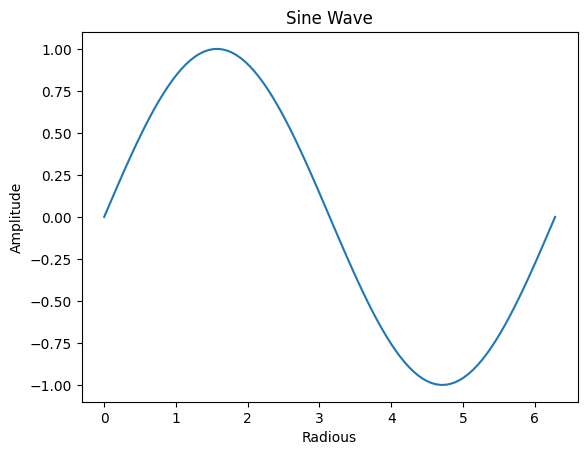

In [ ]:
# try single plot first !
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title("Sine Wave")
plt.xlabel('Radious')
plt.ylabel('Amplitude')
plt.show()

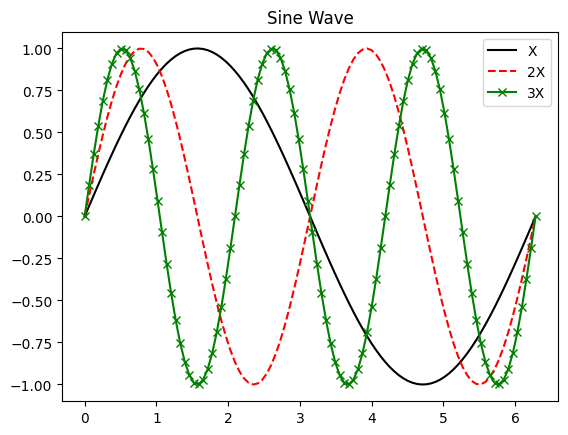

In [ ]:
# try multiple plot and adjust color of lines.
x = np.linspace(0, 2*np.pi, 100)

y1 = np.sin(x)
y2 = np.sin(2*x)
y3 = np.sin(3*x)

plt.plot(x, y1, 'k-',  label=f'X')
plt.plot(x, y2, 'r--', label=f'2X')
plt.plot(x, y3, 'gx-', label=f'3X')

plt.title("Sine Wave")
plt.xlabel('Radious')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

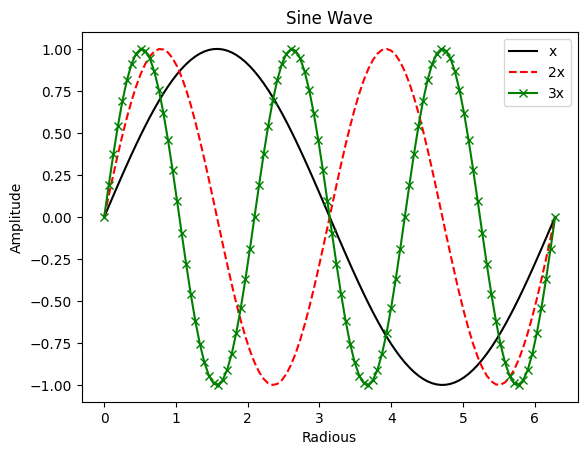

In [ ]:
# use "for loop" do multiple plot.
x = np.linspace(0, 2*np.pi, 100)
y = [np.sin(n*x)
     for n in [1, 2, 3]]

colors = ['k', 'r', 'g']
lines  = ['-', '--', '-']
symbol = ['', '', 'x']
labels = ['x', '2x', '3x']

for i in range(3):
    plt.plot(x, y[i], color=colors[i], marker=symbol[i], linestyle=lines[i], label=labels[i])

plt.title("Sine Wave")
plt.xlabel('Radious')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [2]:
# Condition 1 
# Read data from publiv github.
addres_head = f'https://raw.githubusercontent.com/VolHC/Lab_plot_tutorial/refs/heads/main/Basic_plot'

fn = [f'{addres_head}/demo_data/Demo1.txt',
      f'{addres_head}/demo_data/Demo2.txt',
      f'{addres_head}/demo_data/Demo3.txt',
      f'{addres_head}/demo_data/reference.xye']

fn

['https://raw.githubusercontent.com/VolHC/Lab_plot_tutorial/refs/heads/main/Basic_plot/demo_data/Demo1.txt',
 'https://raw.githubusercontent.com/VolHC/Lab_plot_tutorial/refs/heads/main/Basic_plot/demo_data/Demo2.txt',
 'https://raw.githubusercontent.com/VolHC/Lab_plot_tutorial/refs/heads/main/Basic_plot/demo_data/Demo3.txt',
 'https://raw.githubusercontent.com/VolHC/Lab_plot_tutorial/refs/heads/main/Basic_plot/demo_data/reference.xye']

In [1]:
# Condition 2
# Read data from local ascii type data.
path = f'/Users/chen.bh/git/Lab_plot_tutorial/Basic_plot'

fn = [f'{path}/demo_data/Demo1.txt',
      f'{path}/demo_data/Demo2.txt',
      f'{path}/demo_data/Demo2.txt',
      f'{path}/demo_data/reference.xye']

labels = ['Demo_1', 'Demo_2', 'Demo_3', 'reference']

fn

['/Users/chen.bh/git/Lab_plot_tutorial/Basic_plot/demo_data/Demo1.txt',
 '/Users/chen.bh/git/Lab_plot_tutorial/Basic_plot/demo_data/Demo2.txt',
 '/Users/chen.bh/git/Lab_plot_tutorial/Basic_plot/demo_data/Demo2.txt',
 '/Users/chen.bh/git/Lab_plot_tutorial/Basic_plot/demo_data/reference.xye']

In [ ]:
# Condition 3
# Using colab and read data from local ascii type data.

from google.colab import files
uploaded = files.upload()
uploaded.keys()

fn  = list(uploaded.keys())[0]
fn

In [ ]:
# Read data from files.
xye = []
for n in fn:
	xye.append(np.loadtxt(f'{n}', skiprows=2).T) 

#np.loadtxt : read txt/ascii file  
#skiprows : skip read how many rows at file starting.
#T : transform matrix, column to row, row to column. AT:(aij​)↦(aji​).

xye

In [ ]:
#T : transform matrix, column to row, row to column. AT:(aij​)↦(aji​).

xye

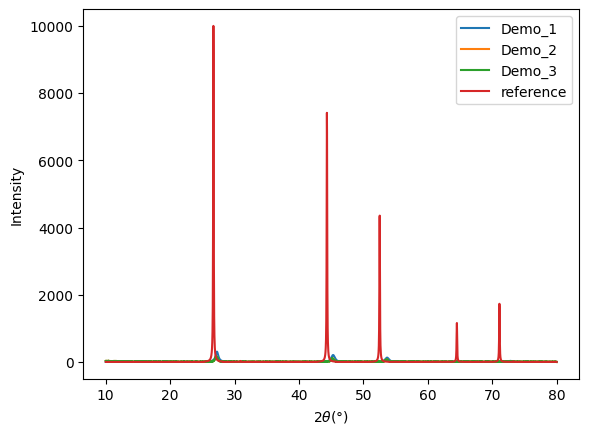

In [24]:
# Use for loop plot diffraction data
for i in range(4):
    plot_x = xye[i][0]
    plot_y = xye[i][1]
    plt.plot(plot_x, plot_y, linestyle='-', label=labels[i])

plt.xlabel('2' + r'$\theta$' +'(\u00b0)')
plt.ylabel('Intensity')
plt.legend()
plt.show()

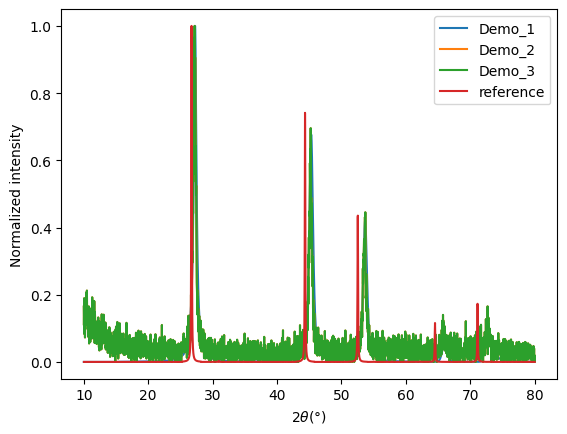

In [ ]:
# Use for loop to plot "Normalized" diffraction data

#Define a function for Intensity normalization.
def normalize_intensity(intensity):
    Nor_Int = intensity/max(intensity)
    return(Nor_Int)

for i in range(4):
    plot_x = xye[i][0]
    plot_y = normalize_intensity(xye[i][1])
    plt.plot(plot_x, plot_y, linestyle='-', label=labels[i])

plt.xlabel('2' + r'$\theta$' +'(\u00b0)')
plt.ylabel('Normalized intensity')
plt.xlim()
plt.legend()
plt.show()

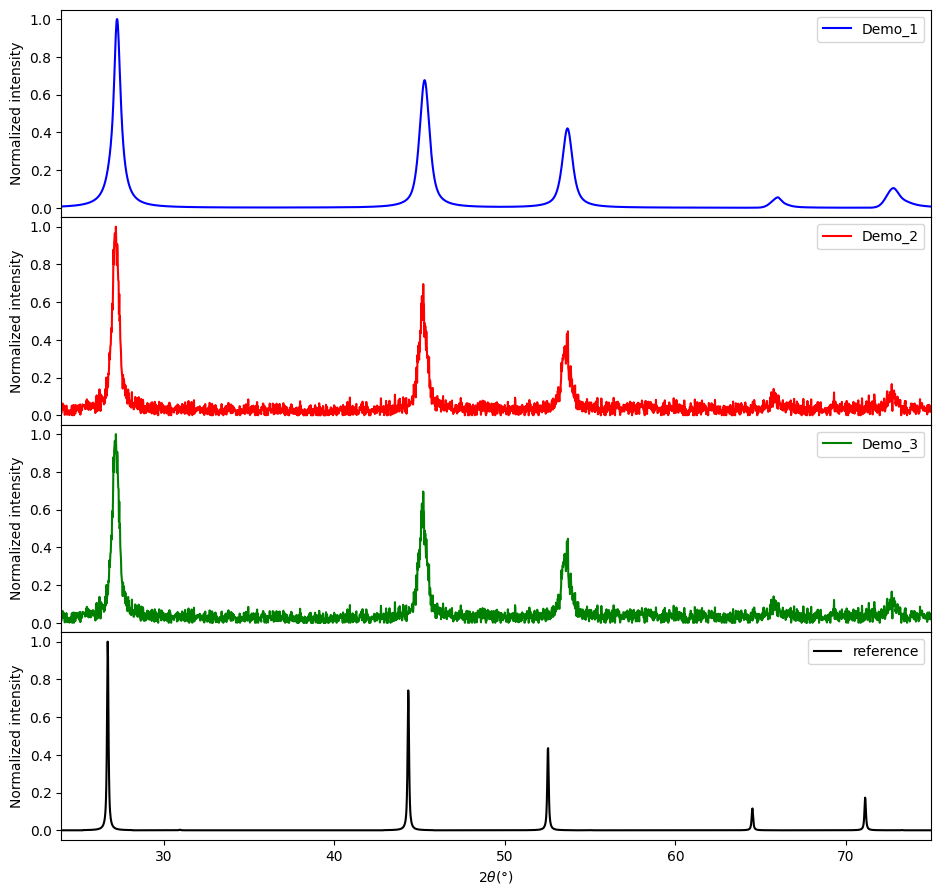

In [ ]:
# stacking plot in a subplot.
colors = ['b', 'r', 'g', 'k']

fig, axs = plt.subplots(4, 1, sharex=True, figsize=(10, 10))
fig.subplots_adjust(hspace=0, wspace=0.0, left=0.1, right=0.97, top=0.95, bottom=0.12)

for i in range(4):
    plot_x = xye[i][0]
    plot_y = normalize_intensity(xye[i][1])
    axs[i].plot(plot_x, plot_y, linestyle='-', color=colors[i], label=labels[i])
    axs[i].legend()
    axs[i].set_ylabel('Normalized intensity')

plt.xlabel('2' + r'$\theta$' +'(\u00b0)')

plt.xlim(24, 75) # set X axis plot range
plt.show()

 